# Automatic and Continuously Updated Analysis of XAS *In-Situ* Data w. Measured Standards
Notebook showing an example workflow used for automatic and continuous analysis of XAS *in-situ* data when standards for both unreduced precursors and reduced metal foils have been measured on the same instrument.

This notebook should only be considered as a help and guide for performing automatic analysis of XAS data. 
It is therefore encouraged to make modifications to the notebook to fit your specific needs.

# Imports
Here the required packages and functions are imported.

Whether plots are interactive is also changed here. 

In [1]:
# Functions written for the analysis of XAS data
from autoXAS.data import *
from autoXAS.LCA import *
from autoXAS.plotting import *
from autoXAS.continuous_analysis import *

%matplotlib inline

# Boolean flags
Here the values of boolean flags (True/False) that occur throughout the notebook can be changed.

In [2]:
# Decide if transmission or absorption data should be used for normalization and analysis
use_transmission = False
# Decide if subtraction of pred-edge should be used for normalization
use_preedge = True
# Decide if plots should be interactive or static
interactive = False

# Standards and preprocessing
Here the measured standards (metal foils and precursors) are loaded and preprocessed. 

This section only needs to be run once, as it applies to all experiments measured on the same instrument.

## Metal foils

In [3]:
# Specify data location
folder_metal_foils = './Data/ESRF_BM31/Standards/Standards/'

# Load data
df_foils = load_xas_data(
    folder_metal_foils,
    synchrotron='ESRF', 
    file_selection_condition='mono', 
    negated_condition=True,
)

# Initial data processing
df_foils = processing_df(df_foils, synchrotron='ESRF')

Loading data: 100%|██████████| 6/6 [00:00<00:00, 19.20it/s, Currently loading Rufoil.dat]


### Edge energy corrections
The energy shifts of the different edges are systematic errors from the instrument. Therefore the shift is consistent across measurements and we can correct the measured data using the theoretical edge energies.

In [4]:
# Calculate the edge energy shift at each edge
edge_correction_energies = {
    'Pd':calc_edge_correction(df_foils, metal='Pd', edge='K', transmission=use_transmission),
    'Ag':calc_edge_correction(df_foils, metal='Ag', edge='K', transmission=use_transmission),
    'Rh':calc_edge_correction(df_foils, metal='Rh', edge='K', transmission=use_transmission),
    'Ru':calc_edge_correction(df_foils, metal='Ru', edge='K', transmission=use_transmission),
    'Mn':calc_edge_correction(df_foils, metal='Mn', edge='K', transmission=use_transmission),
    'Mo':calc_edge_correction(df_foils, metal='Mo', edge='K', transmission=use_transmission),
    'Ir':calc_edge_correction(df_foils, metal='Ir', edge='L3', transmission=use_transmission),
    'Pt':calc_edge_correction(df_foils, metal='Pt', edge='L3', transmission=use_transmission),
    }

### Normalization
Normalization includes correcting the energy shifts, subtraction by the minimum measured value and division by a fit to the post-edge data. A fit to the pre-edge data can also be used to subtract from the data, but can sometimes lead to overcorrections. 

The pre- and post-edge fits can be visually inspected using the "plot_non_normalized_xas()" function with the optional arguments "pre_edge=True" and "post_edge=True". 

All normalization of data **must** use the same normalization procedure!

In [5]:
# Normalization of the data
normalize_data(
    df_foils, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission,
)
df_foils.head()

,Filename,Experiment,Measurement,ZapEnergy,MonEx,xmap_roi00,Ion1,Metal,Precursor,Energy,Temperature,Absorption,Transmission,Energy_Corrected,Normalized,pre_edge,post_edge
0,Agfoil.dat,Agfoil,1,25.400257,1838.0,1642.0,47334.0,Ag,foil,25400.257812,25.791746,0.893362,-3.248551,25392.158203,0.003653,-0.151765,57.481832
1,Agfoil.dat,Agfoil,1,25.400560,1856.0,1549.0,47827.0,Ag,foil,25400.560547,25.791746,0.834590,-3.249167,25392.460938,0.002536,-0.146117,57.481148
2,Agfoil.dat,Agfoil,1,25.401297,1854.0,1587.0,47723.0,Ag,foil,25401.296875,25.791746,0.855987,-3.248068,25393.197266,0.002669,-0.132379,57.479485
3,Agfoil.dat,Agfoil,1,25.402010,1855.0,1650.0,47774.0,Ag,foil,25402.009766,25.791746,0.889488,-3.248597,25393.910156,0.003021,-0.119078,57.477874
4,Agfoil.dat,Agfoil,1,25.402702,1855.0,1670.0,47787.0,Ag,foil,25402.703125,25.791746,0.900270,-3.248869,25394.603516,0.002984,-0.106142,57.476307


### Plotting
It is always a good idea to visually inspect the data to see if it behaves as it should.

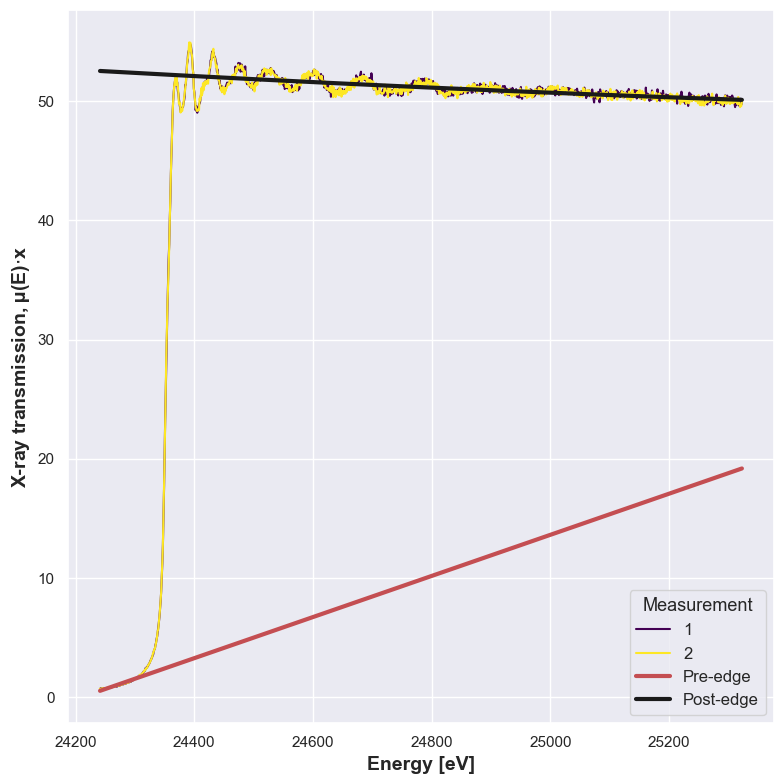

In [6]:
plot_non_normalized_xas(df_foils, 'Pdfoil', pre_edge=True, post_edge=True, transmission=use_transmission, interactive=interactive)

## Precursors

In [7]:
# Specify data loccation
folder_precursor_standards = './Data/ESRF_BM31/wheel/wheel/'

# Load data
df_precursors = load_xas_data(
    folder_precursor_standards, 
    synchrotron='ESRF', 
    file_selection_condition='mono', 
    negated_condition=True,
)

# Initial data processing
df_precursors = processing_df(df_precursors, synchrotron='ESRF')

Loading data: 100%|██████████| 8/8 [00:00<00:00, 19.30it/s, Currently loading Ruacac.dat]

Incomplete measurement detected!
Not all edges were measured 3 times, but only 2 times.
Incomplete measurements will be removed unless keep_incomplete="True".

Incomplete measurements were removed!


### Normalization

In [8]:
# Normalization of the data
normalize_data(
    df_precursors, 
    edge_correction_energies, 
    subtract_preedge=use_preedge, 
    transmission=use_transmission
)
df_precursors.head()

,Filename,Experiment,Measurement,ZapEnergy,MonEx,xmap_roi00,Ion1,Metal,Precursor,Energy,Temperature,Absorption,Transmission,Energy_Corrected,Normalized,pre_edge,post_edge
0,Agacac.dat,Agacac,1,25.400257,15827.0,2483.0,38828.0,Ag,acac,25400.257812,1100.0,0.156884,-0.897424,25392.158203,0.003475,-0.028298,8.114891
1,Agacac.dat,Agacac,1,25.400560,15951.0,2585.0,39134.0,Ag,acac,25400.560547,1100.0,0.162059,-0.897470,25392.460938,0.004003,-0.027416,8.114993
2,Agacac.dat,Agacac,1,25.401253,15932.0,2544.0,39093.0,Ag,acac,25401.251953,1100.0,0.159679,-0.897614,25393.152344,0.003464,-0.025402,8.115225
3,Agacac.dat,Agacac,1,25.402031,15940.0,2685.0,39104.0,Ag,acac,25402.031250,1100.0,0.168444,-0.897393,25393.931641,0.004263,-0.023132,8.115487
4,Agacac.dat,Agacac,1,25.402941,15921.0,2678.0,39048.0,Ag,acac,25402.941406,1100.0,0.168206,-0.897153,25394.841797,0.003909,-0.020481,8.115793


### Plotting
It is always a good idea to visually inspect the data to see if it behaves as it should.

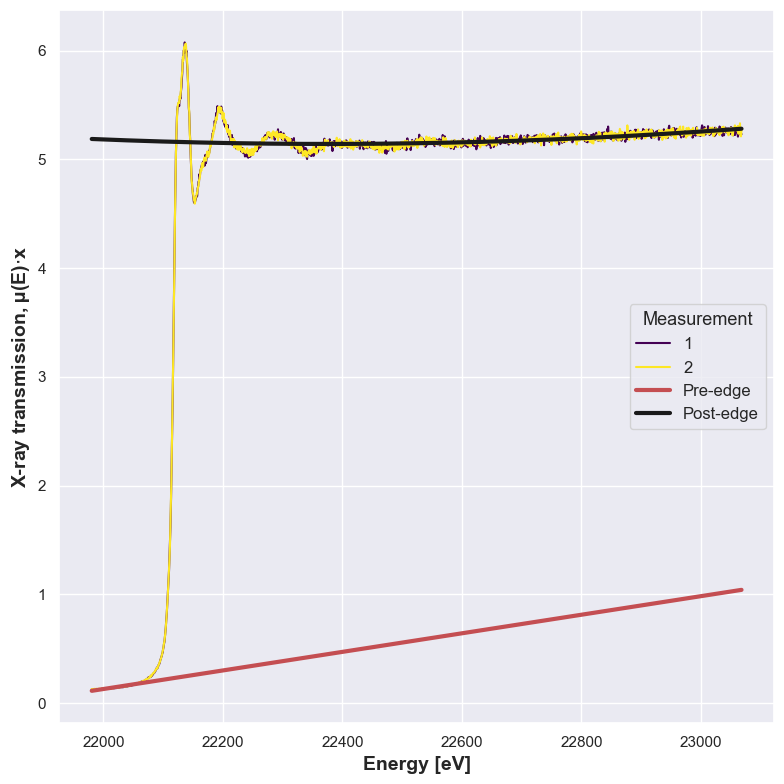

In [9]:
plot_non_normalized_xas(df_precursors, 'Ruacac', pre_edge=True, post_edge=True, transmission=use_transmission, interactive=interactive)

# *In-situ* continuous analysis
Here the measured *in-situ* data is loaded, preprocessed and analysed continuously during the experiment.

Every time a change is made or a new file is created in the watched folder, the analysis will automatically be run again.

In [10]:
# Specify all data locations
list_of_folders = [
    './Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS1/',
    './Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS2/',
    './Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS3/',
    './Data/ESRF_BM31/IrPtPdRuRh_XAS/IrPtPdRuRh_XAS/XAS4/',
]

# Specify all needed function arguments for the analysis
function_arguments = dict(
    data_paths = list_of_folders,
    synchrotron = 'ESRF',
    edge_correction_energies = edge_correction_energies,
    df_foils = df_foils,
    df_precursors = df_precursors,
    metal = 'Pd',
    precursor_suffix = 'acac',
    file_selection_condition = 'mono',
    negated_condition = True,
    use_preedge = use_preedge,
    use_transmission = use_transmission,
    interactive = interactive,
    with_uncertainty = True,
)

In [11]:
# Observer using the watchdog package
# watch_insitu_experiment(
#     './Data/Test/', 
#     in_situ_analysis_standards, 
#     function_arguments, 
#     patterns=['*.txt'],
# )

Loading data: 100%|██████████| 5/5 [00:00<00:00, 15.17it/s, Currently loading Ru.dat]


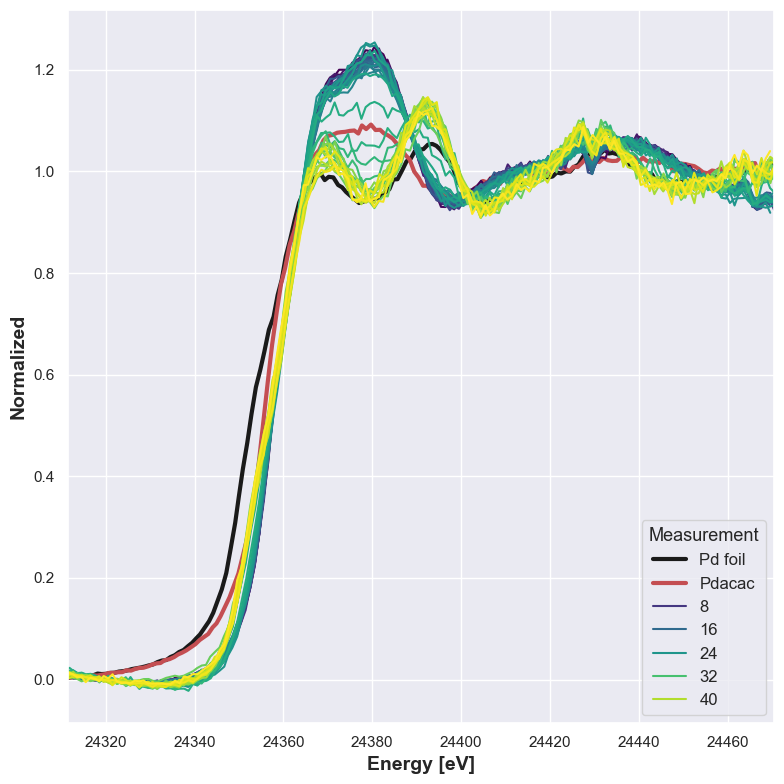

LCA progress: 100%|██████████| 5/5 [00:13<00:00,  2.73s/it, Analysing Ru + Ruacac]


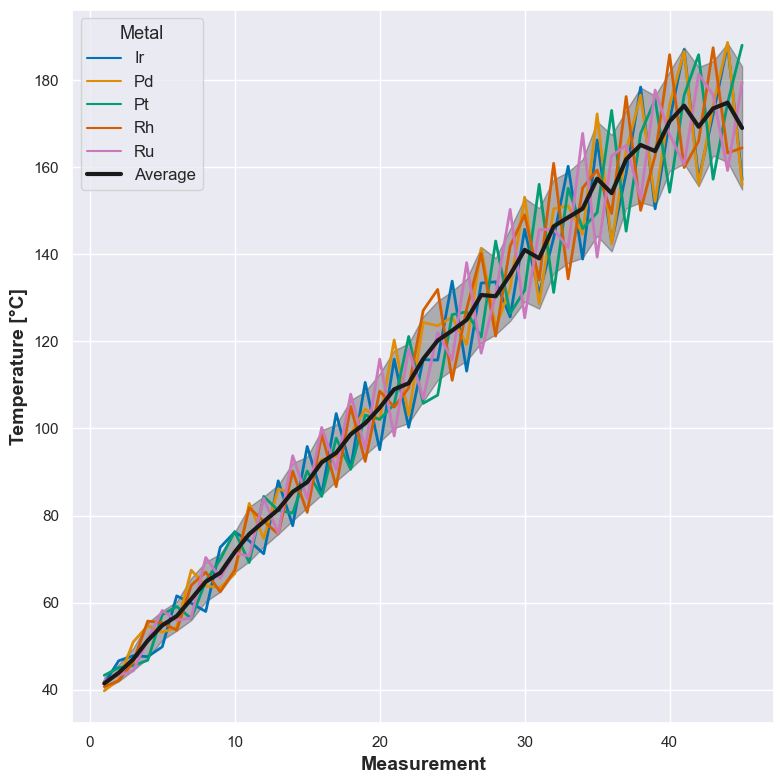

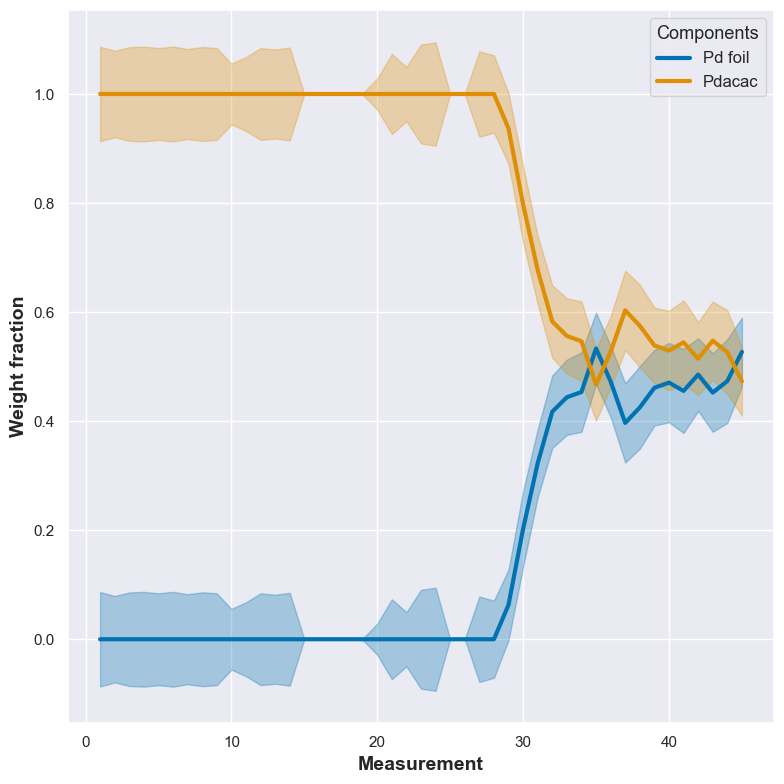

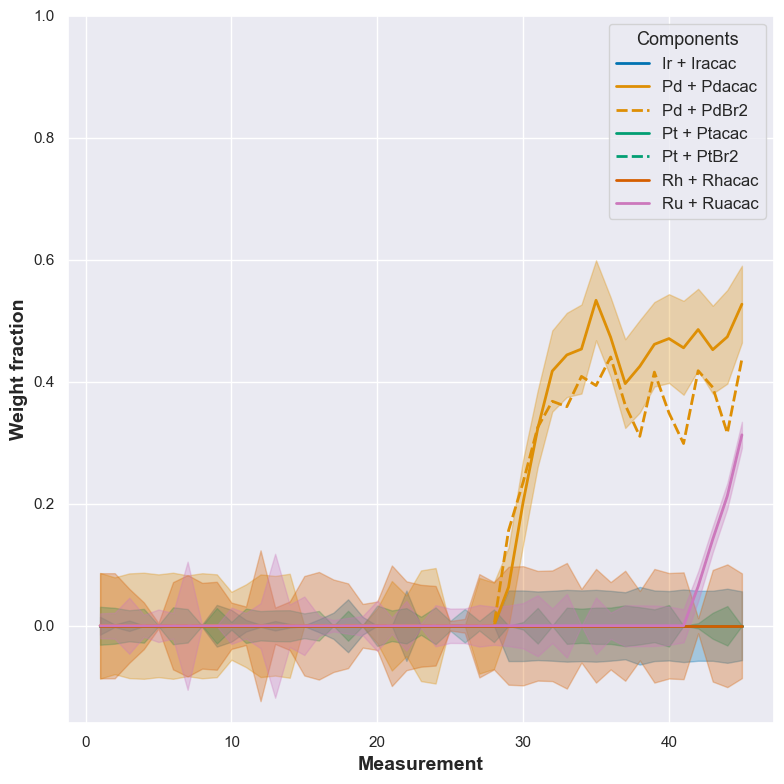


No longer observing ./Data/Test/


In [12]:
# Observer using Pathlib to check the time of the most recent modification.
watch_insitu_experiment_v2(
    './Data/Test/', 
    in_situ_analysis_standards, 
    function_arguments, 
    pattern='*.txt',
)